<a href="https://colab.research.google.com/github/dralvima/CCC_workshop/blob/main/CSD_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

load MATLAB data file

In [10]:
import scipy.io as sio
import numpy as np

# Load the MATLAB file
file_path = 'data.mat'
mat_data = sio.loadmat(file_path)

Do CSD analysis

(4501, 48, 601)


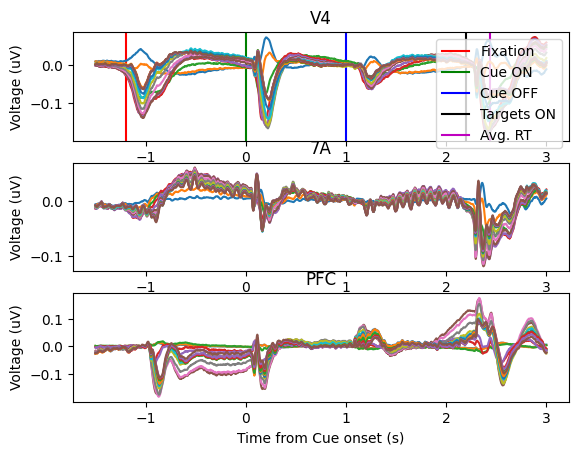

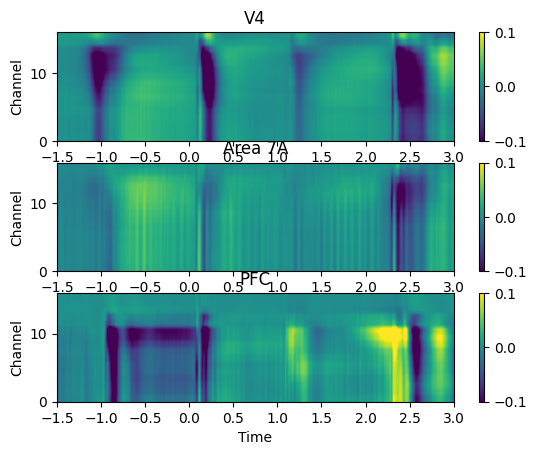

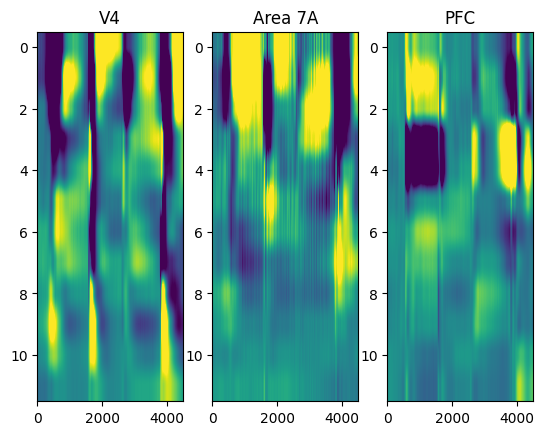

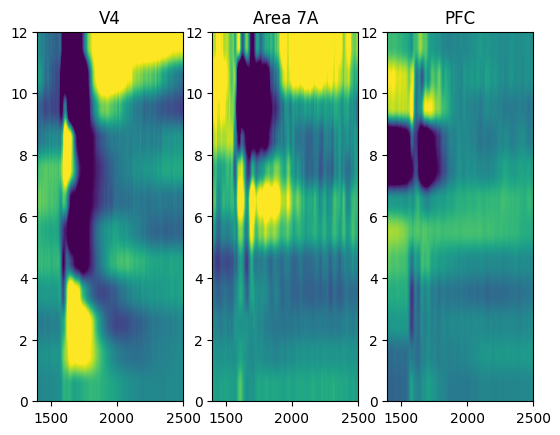

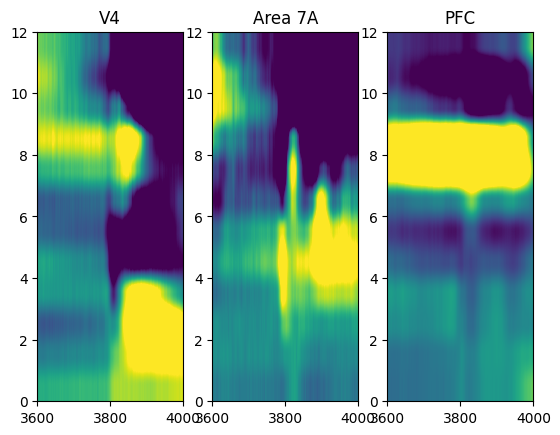

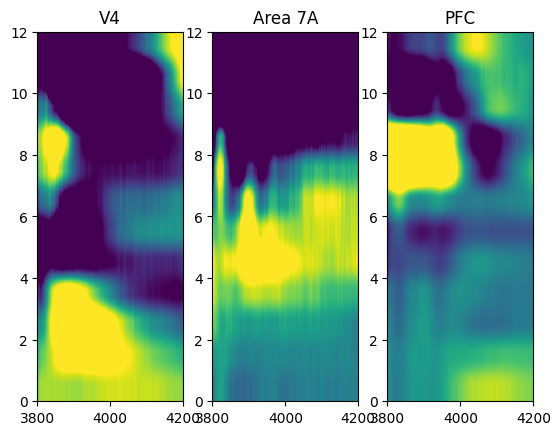

In [16]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

# Load the MATLAB file
data = sio.loadmat('data.mat')

# Access the 'lfp' key
lfp = data['lfp']

# Define regions
U1 = range(0, 16)  # Area PFC
U2 = range(16, 32)  # Area 7A
U3 = range(32, 48)  # Area V4 Foveal

# Define time axis
time_axis = np.arange(-1.5, 3.001, 0.001)

# Plotting LFP Event-Related Potential
plt.figure('LFP Event-Related Potential')
plt.subplot(3, 1, 1)
plt.axvline(-1.2, color='r')
plt.axvline(0, color='g')
plt.axvline(1, color='b')
plt.axvline(2.2, color='k')
plt.axvline(2.438, color='m')
plt.legend(['Fixation', 'Cue ON', 'Cue OFF', 'Targets ON', 'Avg. RT'])
plt.plot(time_axis, np.mean(lfp[:, U1, :], axis=2))
plt.title('V4')
plt.xlabel('Time from Cue onset (s)')
plt.ylabel('Voltage (uV)')

plt.subplot(3, 1, 2)
plt.plot(time_axis, np.mean(lfp[:, U2, :], axis=2))
plt.title('7A')
plt.xlabel('Time from Cue onset (s)')
plt.ylabel('Voltage (uV)')

plt.subplot(3, 1, 3)
plt.plot(time_axis, np.mean(lfp[:, U3, :], axis=2))
plt.title('PFC')
plt.xlabel('Time from Cue onset (s)')
plt.ylabel('Voltage (uV)')
plt.show()

# Plotting LFP Event-Related Potential as images
plt.figure('LFP Event-Related Potential Images')
plt.subplot(3, 1, 1)
plt.imshow(np.mean(lfp[:, U1, :], axis=2).T, aspect='auto', extent=[-1.5, 3, 0, len(U1)])
plt.colorbar()
plt.clim(-0.1, 0.1)
plt.title('V4')
plt.xlabel('Time')
plt.ylabel('Channel')

plt.subplot(3, 1, 2)
plt.imshow(np.mean(lfp[:, U2, :], axis=2).T, aspect='auto', extent=[-1.5, 3, 0, len(U2)])
plt.colorbar()
plt.clim(-0.1, 0.1)
plt.title('Area 7A')
plt.xlabel('Time')
plt.ylabel('Channel')

plt.subplot(3, 1, 3)
plt.imshow(np.mean(lfp[:, U3, :], axis=2).T, aspect='auto', extent=[-1.5, 3, 0, len(U3)])
plt.colorbar()
plt.clim(-0.1, 0.1)
plt.title('PFC')
plt.xlabel('Time')
plt.ylabel('Channel')
plt.show()

# Define variables for CSD calculation
NSampl = 4501  # Number of time samples per trial
NCh = 16  # Number of channels per area
NTrl = lfp.shape[2]  # Number of trials

sig = 0.4  # Cortical conductivity
dis = 200e-3  # Inter-site distance in meters
sep = 2  # Separation between channels

epoched_U1 = lfp[:, U1, :]
epoched_U2 = lfp[:, U2, :]
epoched_U3 = lfp[:, U3, :]

CSD1 = np.zeros((NSampl, NCh - sep * 2, NTrl))
CSD2 = np.zeros((NSampl, NCh - sep * 2, NTrl))
CSD3 = np.zeros((NSampl, NCh - sep * 2, NTrl))

for ch in range(sep, NCh - sep):
    CSD1[:, ch - sep, :] = -sig * (epoched_U1[:, ch - sep, :] - 2 * epoched_U1[:, ch, :] + epoched_U1[:, ch + sep, :]) / ((dis * sep) ** 2)
    CSD2[:, ch - sep, :] = -sig * (epoched_U2[:, ch - sep, :] - 2 * epoched_U2[:, ch, :] + epoched_U2[:, ch + sep, :]) / ((dis * sep) ** 2)
    CSD3[:, ch - sep, :] = -sig * (epoched_U3[:, ch - sep, :] - 2 * epoched_U3[:, ch, :] + epoched_U3[:, ch + sep, :]) / ((dis * sep) ** 2)

mCSD1 = np.mean(CSD1, axis=2)
mCSD2 = np.mean(CSD2, axis=2)
mCSD3 = np.mean(CSD3, axis=2)

# Plot CSD - whole trial
plt.figure('CSD - whole trial')
plt.subplot(1, 3, 1)
plt.imshow(mCSD1.T, aspect='auto')
plt.clim(-0.05, 0.05)
plt.title('V4')

plt.subplot(1, 3, 2)
plt.imshow(mCSD2.T, aspect='auto')
plt.clim(-0.025, 0.025)
plt.title('Area 7A')

plt.subplot(1, 3, 3)
plt.imshow(mCSD3.T, aspect='auto')
plt.clim(-0.15, 0.15)
plt.title('PFC')
plt.show()

# Plot CSD - stimulus
plt.figure('CSD stimulus')
plt.subplot(1, 3, 1)
plt.imshow(mCSD1.T, aspect='auto', extent=[0, NSampl, 0, NCh - sep * 2])
plt.xlim([1400, 2500])
plt.clim(-0.05, 0.05)
plt.title('V4')

plt.subplot(1, 3, 2)
plt.imshow(mCSD2.T, aspect='auto', extent=[0, NSampl, 0, NCh - sep * 2])
plt.xlim([1400, 2500])
plt.clim(-0.025, 0.025)
plt.title('Area 7A')

plt.subplot(1, 3, 3)
plt.imshow(mCSD3.T, aspect='auto', extent=[0, NSampl, 0, NCh - sep * 2])
plt.xlim([1400, 2500])
plt.clim(-0.15, 0.15)
plt.title('PFC')
plt.show()

# Plot CSD - test on
plt.figure('CSD test on')
plt.subplot(1, 3, 1)
plt.imshow(mCSD1.T, aspect='auto', extent=[0, NSampl, 0, NCh - sep * 2])
plt.xlim([3600, 4000])
plt.clim(-0.05, 0.05)
plt.title('V4')

plt.subplot(1, 3, 2)
plt.imshow(mCSD2.T, aspect='auto', extent=[0, NSampl, 0, NCh - sep * 2])
plt.xlim([3600, 4000])
plt.clim(-0.025, 0.025)
plt.title('Area 7A')

plt.subplot(1, 3, 3)
plt.imshow(mCSD3.T, aspect='auto', extent=[0, NSampl, 0, NCh - sep * 2])
plt.xlim([3600, 4000])
plt.clim(-0.15, 0.15)
plt.title('PFC')
plt.show()

# Plot CSD - response locked
plt.figure('CSD response locked')
plt.subplot(1, 3, 1)
plt.imshow(mCSD1.T, aspect='auto', extent=[0, NSampl, 0, NCh - sep * 2])
plt.xlim([3800, 4200])
plt.clim(-0.05, 0.05)
plt.title('V4')

plt.subplot(1, 3, 2)
plt.imshow(mCSD2.T, aspect='auto', extent=[0, NSampl, 0, NCh - sep * 2])
plt.xlim([3800, 4200])
plt.clim(-0.025, 0.025)
plt.title('Area 7A')

plt.subplot(1, 3, 3)
plt.imshow(mCSD3.T, aspect='auto', extent=[0, NSampl, 0, NCh - sep * 2])
plt.xlim([3800, 4200])
plt.clim(-0.15, 0.15)
plt.title('PFC')
plt.show()